In [28]:
from keras.layers import Dense, Input
from keras.models import Model
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

In [2]:
embedding_dim = 2

In [62]:
input_data = Input(shape=(20,))
encoded = Dense(embedding_dim, activation='relu')(input_data)
decoded = Dense(20, activation='relu')(encoded)

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

encoded_input = Input(shape=(embedding_dim,))
decoder_layer = autoencoder.layers[-1](encoded_input)
decoder = Model(encoded_input, decoder_layer)

autoencoder.compile(optimizer='adam', loss='mse')

## Get data

In [8]:
path = '../Dodge/data/defect/'

In [63]:
train_df = pd.read_csv(path + 'camel-1.4.csv')
x_train = train_df.drop('bug', axis=1)
y_train = train_df['bug']

In [64]:
y_train = y_train.map(lambda x: 0 if x == 0 else 1)

In [65]:
test_df = pd.read_csv(path + 'camel-1.6.csv')
x_test = test_df.drop('bug', axis=1)
y_test = test_df['bug']

In [66]:
x_train = x_train[x_train.columns[3:]]
x_test = x_test[x_test.columns[3:]]

In [67]:
x_train.shape

(872, 20)

In [68]:
x_train.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,8,2,0,8,31,28,1,7,1,2.000000,394,0.000000,0,0.588235,0.347222,1,1,48.250000,7,3.1250
1,5,0,0,9,17,10,2,8,2,2.000000,97,0.000000,0,0.000000,0.450000,0,0,18.400000,2,1.0000
2,1,1,0,0,1,0,0,0,1,2.000000,1,0.000000,0,0.000000,1.000000,0,0,0.000000,1,1.0000
3,13,3,0,41,73,50,5,41,5,0.892857,344,0.714286,0,0.645161,0.250000,1,1,24.923077,5,1.6154
4,7,2,0,6,13,17,4,2,7,0.750000,46,1.000000,1,0.333333,0.428571,0,0,5.285714,1,0.8571


In [69]:
x_train.shape

(872, 20)

In [70]:
x_test.shape

(965, 20)

In [71]:
autoencoder.fit(np.array(x_train), np.array(x_train), epochs=500)

Epoch 1/500
872/872 [==============================] - 0s 96us/step - loss: 11579.1260
Epoch 2/500
872/872 [==============================] - 0s 32us/step - loss: 11577.5254
Epoch 3/500
872/872 [==============================] - 0s 33us/step - loss: 11575.4953
Epoch 4/500
872/872 [==============================] - 0s 37us/step - loss: 11572.9434
Epoch 5/500
872/872 [==============================] - 0s 31us/step - loss: 11569.8099
Epoch 6/500
872/872 [==============================] - 0s 27us/step - loss: 11566.1546
Epoch 7/500
872/872 [==============================] - 0s 27us/step - loss: 11546.0446
Epoch 8/500
872/872 [==============================] - 0s 31us/step - loss: 11497.6277
Epoch 9/500
872/872 [==============================] - 0s 32us/step - loss: 11399.8752
Epoch 10/500
872/872 [==============================] - 0s 32us/step - loss: 11253.7098
Epoch 11/500
872/872 [==============================] - 0s 27us/step - loss: 11076.0855
Epoch 12/500
872/872 [===================

872/872 [==============================] - 0s 40us/step - loss: 465.5624
Epoch 96/500
872/872 [==============================] - 0s 36us/step - loss: 457.4501
Epoch 97/500
872/872 [==============================] - 0s 34us/step - loss: 443.9243
Epoch 98/500
872/872 [==============================] - 0s 38us/step - loss: 434.3546
Epoch 99/500
872/872 [==============================] - 0s 33us/step - loss: 425.3459
Epoch 100/500
872/872 [==============================] - 0s 31us/step - loss: 414.4908
Epoch 101/500
872/872 [==============================] - 0s 28us/step - loss: 408.3070
Epoch 102/500
872/872 [==============================] - 0s 27us/step - loss: 401.7333
Epoch 103/500
872/872 [==============================] - 0s 25us/step - loss: 385.4864
Epoch 104/500
872/872 [==============================] - 0s 27us/step - loss: 378.5250
Epoch 105/500
872/872 [==============================] - 0s 25us/step - loss: 370.2322
Epoch 106/500
872/872 [==============================] - 0s 2

872/872 [==============================] - 0s 24us/step - loss: 79.1305
Epoch 190/500
872/872 [==============================] - 0s 26us/step - loss: 78.3785
Epoch 191/500
872/872 [==============================] - 0s 25us/step - loss: 77.5576
Epoch 192/500
872/872 [==============================] - 0s 23us/step - loss: 76.7543
Epoch 193/500
872/872 [==============================] - 0s 27us/step - loss: 76.3825
Epoch 194/500
872/872 [==============================] - 0s 23us/step - loss: 75.4285
Epoch 195/500
872/872 [==============================] - 0s 22us/step - loss: 74.5365
Epoch 196/500
872/872 [==============================] - 0s 21us/step - loss: 73.8038
Epoch 197/500
872/872 [==============================] - 0s 21us/step - loss: 76.9883
Epoch 198/500
872/872 [==============================] - 0s 19us/step - loss: 74.0271
Epoch 199/500
872/872 [==============================] - 0s 22us/step - loss: 72.7464
Epoch 200/500
872/872 [==============================] - 0s 21us/ste

872/872 [==============================] - 0s 25us/step - loss: 45.6015
Epoch 285/500
872/872 [==============================] - 0s 26us/step - loss: 45.8748
Epoch 286/500
872/872 [==============================] - 0s 28us/step - loss: 45.5951
Epoch 287/500
872/872 [==============================] - 0s 29us/step - loss: 45.5586
Epoch 288/500
872/872 [==============================] - 0s 22us/step - loss: 45.5497
Epoch 289/500
872/872 [==============================] - 0s 21us/step - loss: 45.3639
Epoch 290/500
872/872 [==============================] - 0s 22us/step - loss: 45.4978
Epoch 291/500
872/872 [==============================] - 0s 22us/step - loss: 44.9304
Epoch 292/500
872/872 [==============================] - 0s 21us/step - loss: 44.8157
Epoch 293/500
872/872 [==============================] - 0s 22us/step - loss: 44.9820
Epoch 294/500
872/872 [==============================] - 0s 23us/step - loss: 44.2241
Epoch 295/500
872/872 [==============================] - 0s 23us/ste

872/872 [==============================] - 0s 32us/step - loss: 37.6278
Epoch 380/500
872/872 [==============================] - 0s 27us/step - loss: 37.9824
Epoch 381/500
872/872 [==============================] - 0s 27us/step - loss: 37.7708
Epoch 382/500
872/872 [==============================] - 0s 24us/step - loss: 37.0879
Epoch 383/500
872/872 [==============================] - 0s 22us/step - loss: 38.0880
Epoch 384/500
872/872 [==============================] - 0s 21us/step - loss: 37.5014
Epoch 385/500
872/872 [==============================] - 0s 21us/step - loss: 37.3354
Epoch 386/500
872/872 [==============================] - 0s 27us/step - loss: 36.2957
Epoch 387/500
872/872 [==============================] - 0s 21us/step - loss: 36.6320
Epoch 388/500
872/872 [==============================] - 0s 20us/step - loss: 36.1919
Epoch 389/500
872/872 [==============================] - 0s 22us/step - loss: 43.7420
Epoch 390/500
872/872 [==============================] - 0s 22us/ste

872/872 [==============================] - 0s 23us/step - loss: 32.2756
Epoch 475/500
872/872 [==============================] - 0s 22us/step - loss: 33.4518
Epoch 476/500
872/872 [==============================] - 0s 21us/step - loss: 32.3382
Epoch 477/500
872/872 [==============================] - 0s 22us/step - loss: 33.0422
Epoch 478/500
872/872 [==============================] - 0s 21us/step - loss: 33.7190
Epoch 479/500
872/872 [==============================] - 0s 24us/step - loss: 32.0611
Epoch 480/500
872/872 [==============================] - 0s 26us/step - loss: 32.0062
Epoch 481/500
872/872 [==============================] - 0s 22us/step - loss: 32.3877
Epoch 482/500
872/872 [==============================] - 0s 21us/step - loss: 32.2857
Epoch 483/500
872/872 [==============================] - 0s 21us/step - loss: 32.3872
Epoch 484/500
872/872 [==============================] - 0s 22us/step - loss: 32.0735
Epoch 485/500
872/872 [==============================] - 0s 24us/ste

In [72]:
embedded = encoder.predict(x_train)

In [73]:
embedded.shape

(872, 2)

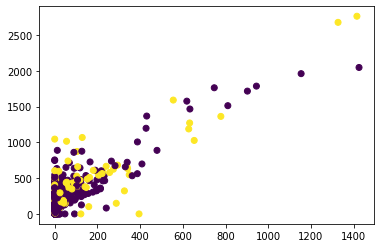

In [74]:
cs = y_train[np.where(embedded.T[0] < 1500)[0]]
embedded = embedded[embedded.T[0] < 1500]
plt.scatter(embedded.T[0], embedded.T[1], c=cs)